In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Ejemplo de diseño y aplicación de filtros digitales (FIR)

Inicialmente se cre una señal de prueba con varios armónicos para observar el desempeño de los filtros
También se calcula su espectro de frecuencia usando la FFT

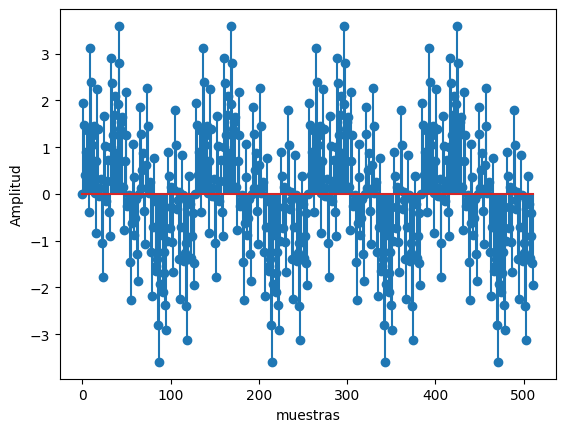

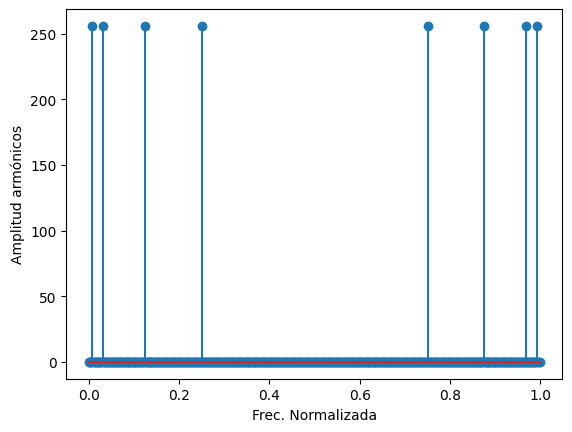

In [158]:
n = np.arange(0,512)
k = n/512
xn=np.sin(2*np.pi*n*1/4)+np.sin(2*np.pi*n*1/8)+np.sin(2*np.pi*n*1/32)+np.sin(2*np.pi*n*1/128)
Xk = abs(np.fft.fft(xn))

# Graficos

#señal
plt.figure(1)
plt.stem(n,xn)
plt.xlabel('muestras')
plt.ylabel('Amplitud')

#magnitud del espectro
plt.figure(2)
plt.stem(k,Xk)
plt.xlabel('Frec. Normalizada')
plt.ylabel('Amplitud armónicos')
plt.show()

Diseño de filtro FIR pasa-bajos mediante método de enventanado

Frecuencia de corte 1/32 ciclos/muestra (frec. normalizada)

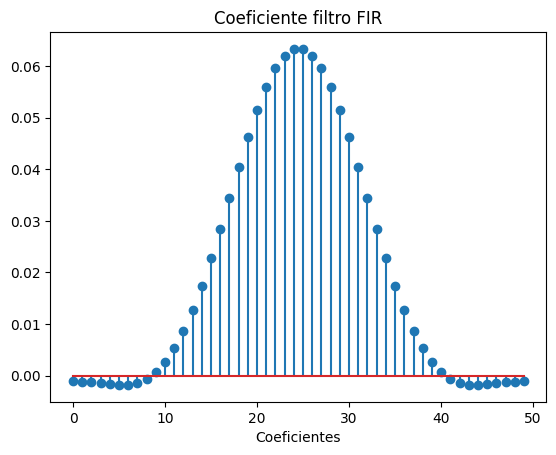

In [159]:
# Obteniendo coeficientes del filtro FIR
n_coef = 50
cut_f = 1/16 # 1/32 x 2
h1n = signal.firwin(n_coef,cut_f)

plt.figure(1)
plt.stem(np.arange(0,len(h1n)),h1n)
plt.title('Coeficiente filtro FIR')
plt.xlabel('Coeficientes')
plt.show()

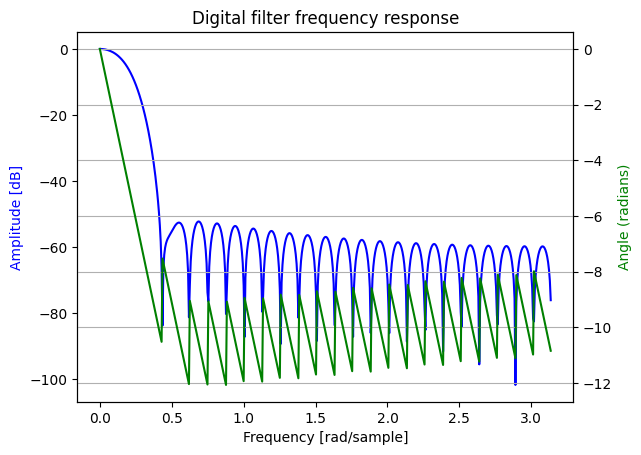

In [160]:
#Respuesta en frecuencia del filtro FIR
w, h = signal.freqz(h1n)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

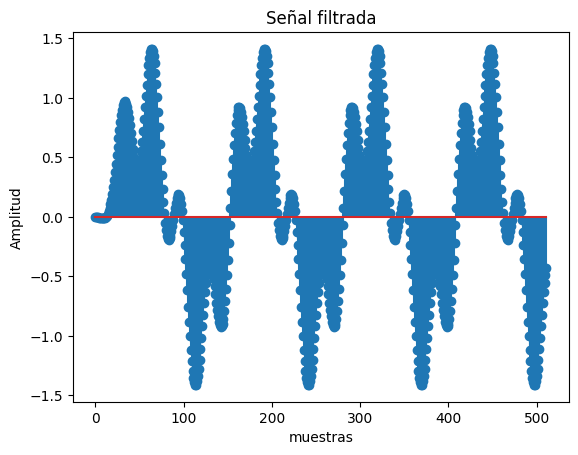

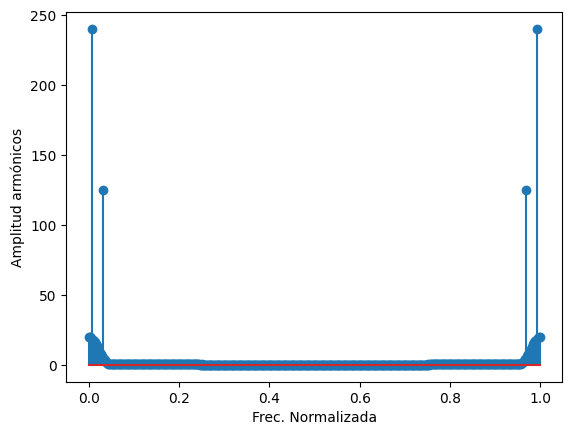

In [161]:
# Filtrar la señal con el filtro obtenido
y1n = signal.lfilter(h1n,1,xn)
plt.figure()
plt.stem(n,y1n)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal filtrada')

plt.figure()
plt.stem(k,abs(np.fft.fft(y1n)))
plt.xlabel('Frec. Normalizada')
plt.ylabel('Amplitud armónicos')
plt.show()

Obteniendo filtro FIR usando la funcion firwin2. 

Diseño de filtro FIR pasa-bajos

Frecuencia de corte 1/32 ciclos/muestra (frec. normalizada)

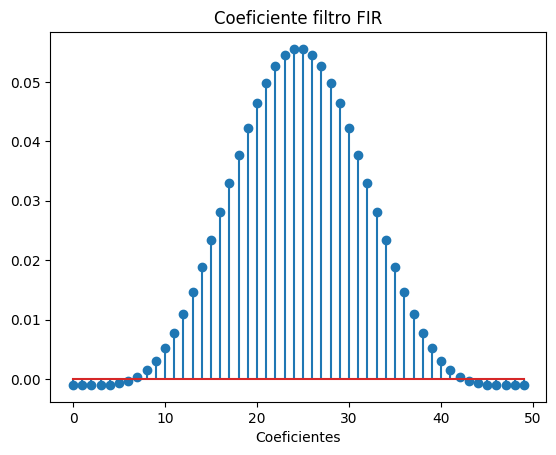

In [162]:
R = 63 #numero de muestras sobre el dominio de la frecuencia
E = 4  #ubicación de la frec de corte sobre el arreglo
F = np.arange(0,R+1)/(R) # Normalización de los valores de frecuencia
A = np.concatenate((np.ones(E) , np.zeros(R-E+1))) # valores de ganancia
h2n = signal.firwin2(n_coef, F, A)

plt.figure(1)
plt.stem(np.arange(0,len(h2n)),h2n)
plt.title('Coeficiente filtro FIR')
plt.xlabel('Coeficientes')
plt.show()

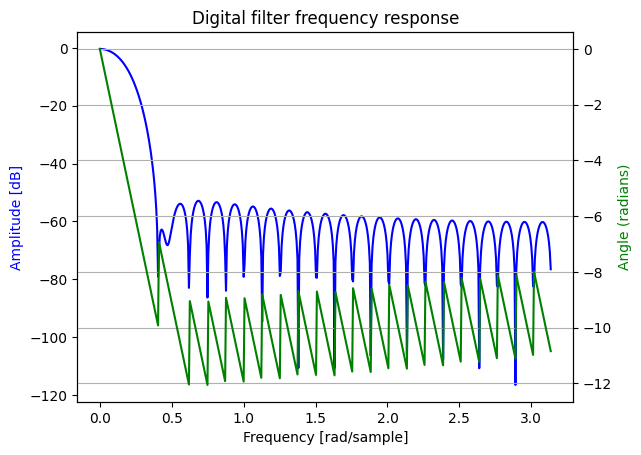

In [163]:
#Respuesta en frecuencia del filtro FIR
w, h = signal.freqz(h2n)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

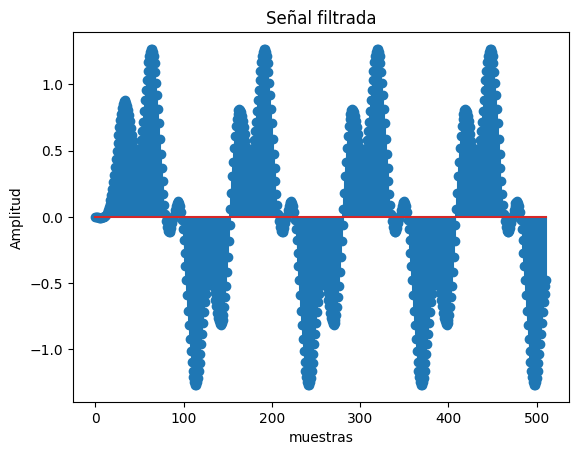

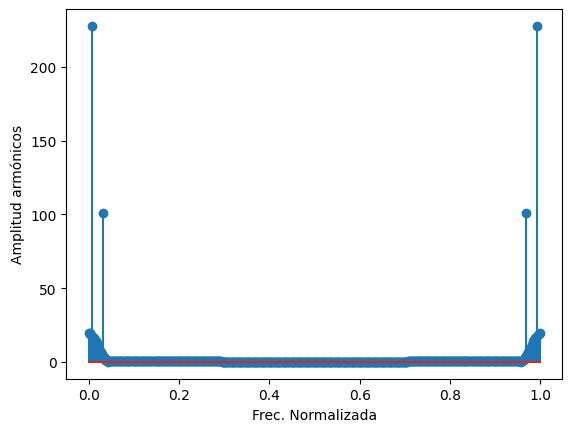

In [164]:
# Filtrar la señal con el filtro obtenido
y2n = signal.lfilter(h2n,1,xn)
plt.figure()
plt.stem(n,y2n)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal filtrada')

plt.figure()
plt.stem(k,abs(np.fft.fft(y2n)))
plt.xlabel('Frec. Normalizada')
plt.ylabel('Amplitud armónicos')
plt.show()

Obteniendo filtro FIR usando la funcion remez. 

Diseño de filtro FIR pasa-bajos

Frecuencia de corte 1/32 ciclos/muestra (frec. normalizada)

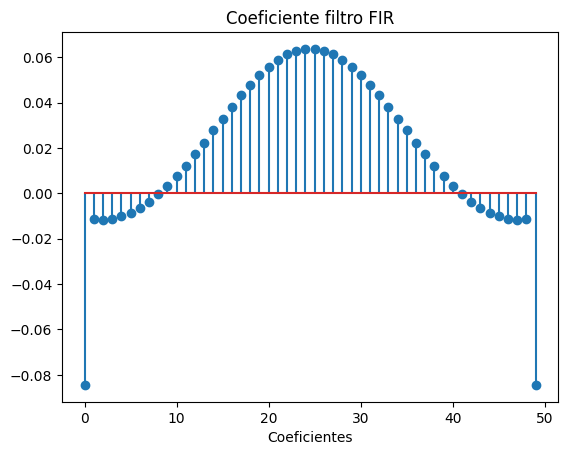

In [165]:
bw = 0.005
cut = 1.0/32.0
B = [0.0, cut-bw, cut+bw, 0.5]
G = [1, 0]
h3n = signal.remez(n_coef, B, G)

plt.figure(1)
plt.stem(np.arange(0,len(h3n)),h3n)
plt.title('Coeficiente filtro FIR')
plt.xlabel('Coeficientes')
plt.show()

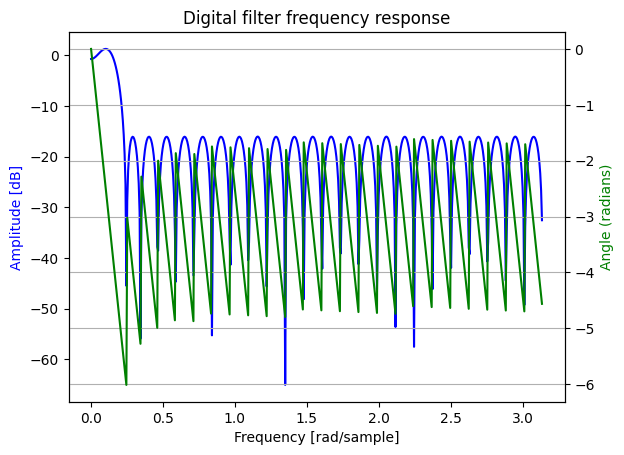

In [166]:
#Respuesta en frecuencia del filtro FIR
w, h = signal.freqz(h3n)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

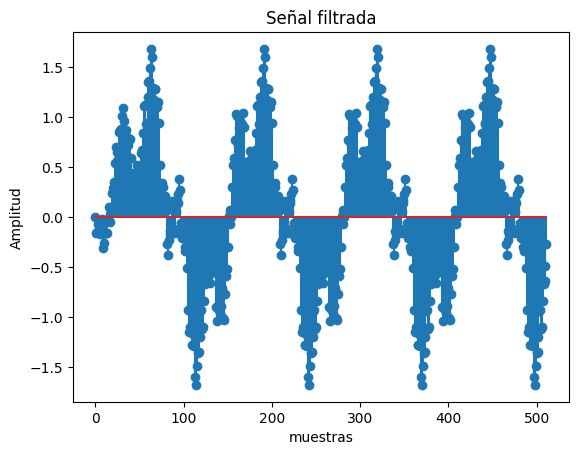

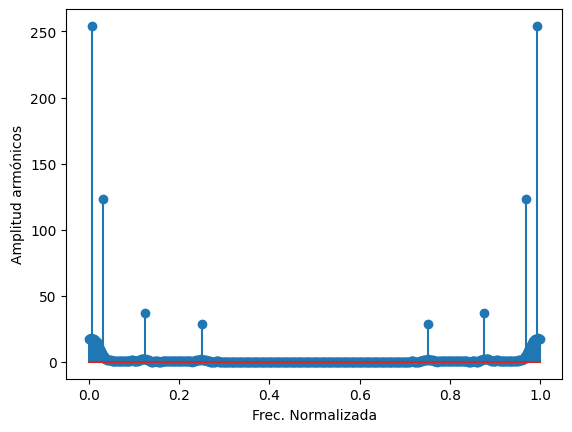

In [167]:
# Filtrar la señal con el filtro obtenido
y3n = signal.lfilter(h3n,1,xn)
plt.figure()
plt.stem(n,y3n)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal filtrada')

plt.figure()
plt.stem(k,abs(np.fft.fft(y3n)))
plt.xlabel('Frec. Normalizada')
plt.ylabel('Amplitud armónicos')
plt.show()

Compare el desempeño de los filtros. Analice en el dominio de la frecuencia cerca de la frecuencia de corte.

¿Cómo se puede determinar cuál de los tres filtros es mejor?